## python 的特殊方法

In [1]:
# module of pocker 
import collections

Card = collections.namedtuple('Card', ['rank', 'suit'])

class FrenchDeck:
  ranks = [str(n) for n in range(2,11)] + list('JQKA')
  suits  = 'spades diamonds clubs hearts'.split()

  def __init__(self):
    self._cards  = [Card(rank,suit) for suit in self.suits
                      for rank in self.ranks]
  def __len__(self):
    return len(self._cards)

  def __getitem__(self, position):
    return self._cards[position] 

> namedtuple   
>  當一個tuple具有許多item，但欄位性質又還沒複雜到需要用class來管理，就適合以namedtuple、以欄位名存取各item的欄位性質。

In [2]:
# 取得第一張、最後一張卡
deck = FrenchDeck()
deck[0], deck[-1]

(Card(rank='2', suit='spades'), Card(rank='A', suit='hearts'))

In [3]:
# 隨機抽卡
import random
random.choice(deck)

Card(rank='K', suit='diamonds')

In [4]:
# 因為__getitem__是使用 self._cards的[]運算子，因此支援slicing功能
deck[:3]

[Card(rank='2', suit='spades'),
 Card(rank='3', suit='spades'),
 Card(rank='4', suit='spades')]

In [5]:
for card in reversed(deck[:3]): print(card)

Card(rank='4', suit='spades')
Card(rank='3', suit='spades')
Card(rank='2', suit='spades')


* FrenchDeck是一個 Pythonic 的函數，透過__len__與__getitem__ 取得 python的迭代、slicing功能


> Dunder Method (前後雙底線)  
> python事先提供一些可覆寫的函數，直譯器會直接呼叫這些函數(這也是python程式碼簡潔的原因之一) 
* object.__len__(self)  :   
    調用此方法以實現內置函數 len()
* object.__getitem__(self, key) :   
    調用此方法以實現 self[key] 的求值。對於序列類型，接受的鍵應爲整數和切片對象。

更多關於Python的Data Model 官方文件 : https://docs.python.org/3.8/reference/datamodel.html#data-model

## 模擬數值型態

In [29]:
# 綜合dunder method 組，建具有 vector(純量) 特性的方法
import math

class Vector:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
    # __repr__ 為方法的返回值
    def __repr__(self):
        return f'Vector({self.x!r},{self.y!r})' # !r 表示為repr格式、取得準確的數值 若沒標明會輸出Vector('1','2')
    def __abs__(self):
        return math.hypot(self.x, self.y)
    def __bool__(self):
        return bool(abs(self))
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x,y)
    def __mul__(self, scaler):
        return Vector(self.x * scaler, self.y * scaler)

In [4]:
v = Vector
v(x=1, y=2) + v(x=3, y=4)

Vector(4,6)

In [6]:
v(x=1, y=2) * 3

Vector(3,6)

In [7]:
v(1, 2)

Vector(1,2)

## 物件的字串表示法

> repr() !r  與 str() !s

在PEP規範中視為多餘的寫法 : https://peps.python.org/pep-0498/#s-r-and-a-are-redundant  
difference between str, repr : https://stackoverflow.com/questions/1436703/what-is-the-difference-between-str-and-repr

## 物件的布林值

```
def __bool__(self):  
    return bool(abs(self))
透過實作__bool__ 讓bool達到 bool(self.x or self.y)的用途 
```

In [31]:
x = 0
y = ''
bool(x or y)

False

In [32]:
x = 1
y = ''
bool(x or y)

True

## 實作collection

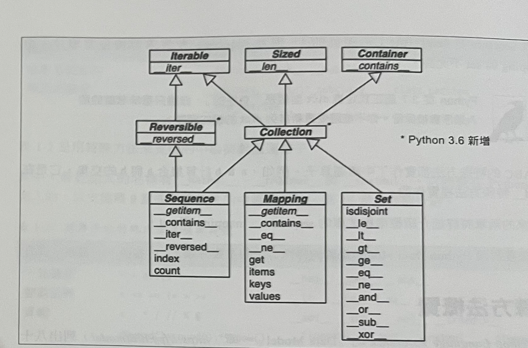

> collection ABC (Abstract Base Classes for Containers)  
  
> 包含 iterable, sized, container, reversible, sequence, mapping, set   

主要重點會應用 sequence, mapping, set這三種，sequence允許reversible(反向排序)、而mapping與set不行。  
python提供多元的資料型態，包含decimal與fraction，decimal為十進位的表示、fraction的特點則是接受分數形式的表達方式。  
詳細比較可參照官網 : https://docs.python.org/zh-tw/dev/tutorial/floatingpoint.html